# Prediksi Harga Mobil dengan Metode Machine Learning

# **Business Understanding**
___
## Problem Statements

Berdasarkan uraian latar belakang diatas, permasalahan yang dapat diselesaikan pada proyek ini ialah:
- Bagaimana cara menganalisa data harga mobil bekas?
- Bagaimana cara memproses data harga mobil bekas agar dapat dilatih dengan baik oleh model ?
- bagaimana cara membuat model machine learning yang dapat memprediksi harga mobil bekas dengan baik ?

## Goals

Tujuan proyek ini dibuat adalah sebagai berikut:
- Mendapatkan analisa yang cukup terkait data harga mobil bekas.
- Mendapatkan prosedut persiapan data agar dapat dilatih oleh model dengan baik.
- Merancang model machine learning yang dapat memprediksi harga mobil bekas.
- Memprediksi harga mobil bekas secara akurat.

## Solution statements
Solusi yang dapat diterapkan untuk menyelesaikan permasalahan tersebut adalah :
- Melakukan analisa data terkait data harga mobil bekas dengan menerapkan Exploratory data analysis (EDA) seperti teknik visualisasi. Adapun analisa yang dapat dilakukan ialah
    - Menangani missing value.
    - mengeksplor korelasi variabel atau data fitur terhadap variabel target yaitu harga.
    - Menangani outlier.
    - Menormalisasi data.

- Melakukan persiapan data, seperti :
    - Encoding fitur kategori.
    - Reduksi dimensi.
    - Spliting data.

- Menerapkan teknik Grid Search untuk mendapatkan parameter-parameter dengan performa terbaik pada masing-masing model.

# **Data Understanding**
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
# load the dataset
url = 'https://raw.githubusercontent.com/royanfauzimaulana25/Datasets/main/CarPricesPrediction.csv'
car_prices = pd.read_csv(url)

## Exploratory Data Analysis
___


berdasarkan analisa pada data, didapatkan informasi sebagai berikut :
- format dataset yaitu CSV (Comma Separeted Value).
- Jumlah kolom pada dataset berjumlah 7 Kolom, antara lain: no, make, model, year, Mileage, Condition, Price.
- Fitur Target Merupakan kolom Prices.
- Terdapat 1000 sample data didalam dataset.
- Terdapat 2 kolom data yang memiliki tipe data integer yaitu (Milleage dan Year).
- Terdapat 3 Kolom data yang memiliki tipe data object atau string yaitu (Make, Model, Condition).
- Terdapat 1 Kolom data yang memiliki tipe data float64 yaitu (Price).
- Terdapat 1 kolom tidak bernama yang tidak memiliki makna apapun pada kolom pertama (akan dihapus).
- tidak terdapat missing value pada dataset.

### Deskripsi Variabel

#### Variabel-variabel pada Car Prices dataset adalah sebagai berikut:
- Make: Produsen brand mobil (Chevrolet, Toyota, Ford, Honda, dan Nissan).
- Model: model / seri mobil (Altima, Camry, Silverado, F-150, Civic).
- Year: Tahun pembuatan mobil (2010 - 2022).
- Mileage: Jarak yang telah ditempuh mobil dalam mil (10K - 150K).
- Condition: kondisi mobil dari terbaik ke terburuk (Excellent, Good, Fair)
- Price: Harga Mobil dalam dolar.

In [3]:
car_prices.head()

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85


In [4]:
# Menghilangkan kolom pertama karena tidak memiliki makna apapun selain no urut baris
car_prices = car_prices[['Make', 'Model', 'Year', 'Mileage', 'Condition', 'Price']]
car_prices

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022,18107,Excellent,19094.75
1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,Chevrolet,Civic,2016,46054,Good,23697.30
3,Ford,Civic,2022,34981,Excellent,18251.05
4,Chevrolet,Civic,2019,63565,Excellent,19821.85
...,...,...,...,...,...,...
995,Nissan,Camry,2010,149032,Excellent,24548.50
996,Chevrolet,F-150,2014,20608,Excellent,26969.70
997,Ford,Altima,2016,109851,Good,20507.55
998,Toyota,Silverado,2010,11704,Good,31414.90


In [5]:
car_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       1000 non-null   object 
 1   Model      1000 non-null   object 
 2   Year       1000 non-null   int64  
 3   Mileage    1000 non-null   int64  
 4   Condition  1000 non-null   object 
 5   Price      1000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [6]:
car_prices.count()

Make         1000
Model        1000
Year         1000
Mileage      1000
Condition    1000
Price        1000
dtype: int64

### Mengubah fitur Year menjadi umur mobil

Umur mobil akan mempengaruhi harga mobil

Year --> Years of Manufacture

In [7]:
car_prices['Present Year'] = 2024
car_prices['Years Of Manufacture'] = car_prices['Present Year'] - car_prices['Year']
car_prices.drop(['Present Year'], inplace = True, axis = 1)
car_prices.drop(['Year'], inplace = True, axis = 1)

In [8]:
car_prices

,Make,Model,Mileage,Condition,Price,Years Of Manufacture
0,Ford,Silverado,18107,Excellent,19094.75,2
1,Toyota,Silverado,13578,Excellent,27321.10,10
2,Chevrolet,Civic,46054,Good,23697.30,8
3,Ford,Civic,34981,Excellent,18251.05,2
4,Chevrolet,Civic,63565,Excellent,19821.85,5
...,...,...,...,...,...,...
995,Nissan,Camry,149032,Excellent,24548.50,14
996,Chevrolet,F-150,20608,Excellent,26969.70,10
997,Ford,Altima,109851,Good,20507.55,8
998,Toyota,Silverado,11704,Good,31414.90,14


### Memeriksa Missing Value

In [9]:
car_prices.isnull().sum()

Make                    0
Model                   0
Mileage                 0
Condition               0
Price                   0
Years Of Manufacture    0
dtype: int64

### Memeriksa Distribusi Data

In [10]:
car_prices.describe()

,Mileage,Price,Years Of Manufacture
count,1000.000000,1000.000000,1000.00000
mean,78796.927000,22195.205650,8.13500
std,39842.259941,4245.191585,3.78247
min,10079.000000,12613.000000,2.00000
25%,44942.750000,18961.862500,5.00000
50%,78056.500000,22247.875000,8.00000
75%,112366.250000,25510.275000,11.00000
max,149794.000000,31414.900000,14.00000


### Memeriksa Outliers

memeripkan Outlier yang merupakan nilai yang jauh dari pusat sebarannya.

Teknik yang digunakan untuk menangani outlier adalah IQR (Interqueartile Range).

#### Visualisasi Outlier dengan Boxplot

Kolom yang akan divisualisasi adalah kolom atau fitur numerik yaitu Year, Mileage dan Price

<Axes: xlabel='Years Of Manufacture'>

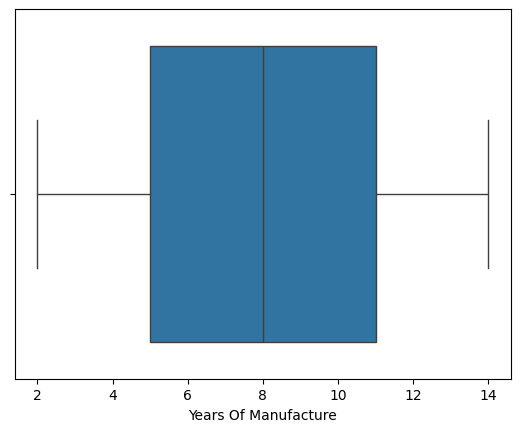

In [11]:
sns.boxplot(x=car_prices['Years Of Manufacture'])

<Axes: xlabel='Mileage'>

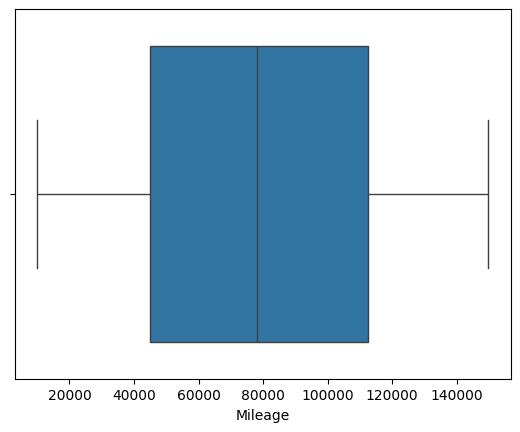

In [12]:
sns.boxplot(x=car_prices['Mileage'])

<Axes: xlabel='Price'>

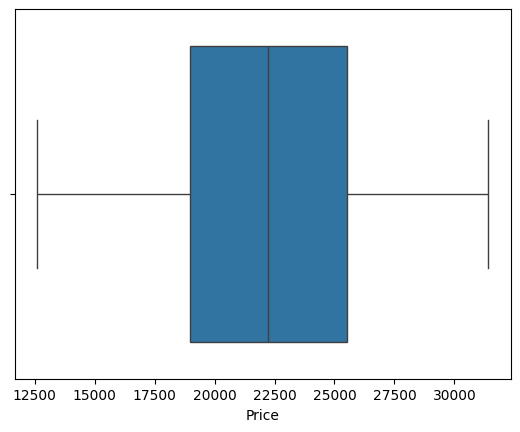

In [13]:
sns.boxplot(x=car_prices['Price'])

Hasilnya, Ketiga fitur numerik tidak memiliki nilai outlier atau nilai yang jauh dari sebarannya.

### Univariate Analysis

Memeriksa korelasi tiap variabel fitur dengan fitur target **Prices**
Kita akan memerika fitur kategorical dan fitur numerical.

In [14]:
numerical_features = ['Price', 'Mileage', 'Years Of Manufacture']
categorical_features = ['Make', 'Model', 'Condition']

#### Categorical Features

           jumlah sampel  persentase
Chevrolet            209        20.9
Toyota               205        20.5
Ford                 199        19.9
Honda                199        19.9
Nissan               188        18.8


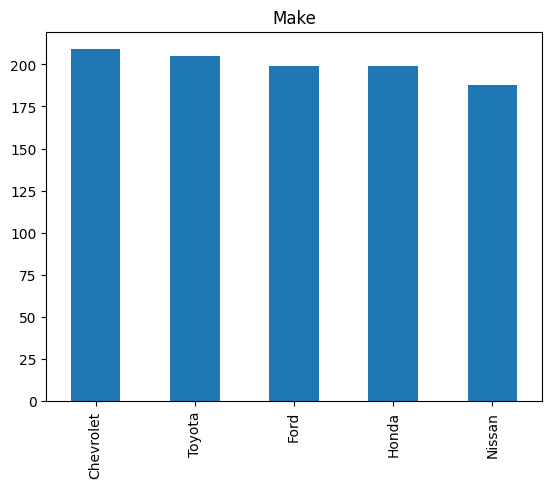

In [15]:
# feature Make
feature = categorical_features[0]
count = car_prices[feature].value_counts()
percent = 100*car_prices[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan grafik diatas, fitur terbesar ialah chevrolet. Namun bila dilihat secara keseluruhan jumlah fitur **Make** satu sama lain tidak terlalu jauh atau hampir sama rata.

           jumlah sampel  persentase
Altima               226        22.6
Camry                212        21.2
Silverado            192        19.2
F-150                188        18.8
Civic                182        18.2


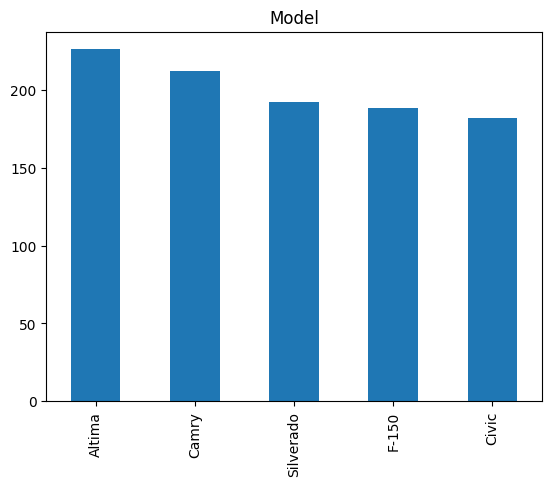

In [16]:
# feature Model
feature = categorical_features[1]
count = car_prices[feature].value_counts()
percent = 100*car_prices[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan grafik diatas, sebagian besar fitur didominasi oleh model **Altima** dan **Camry**.

           jumlah sampel  persentase
Excellent            595        59.5
Good                 292        29.2
Fair                 113        11.3


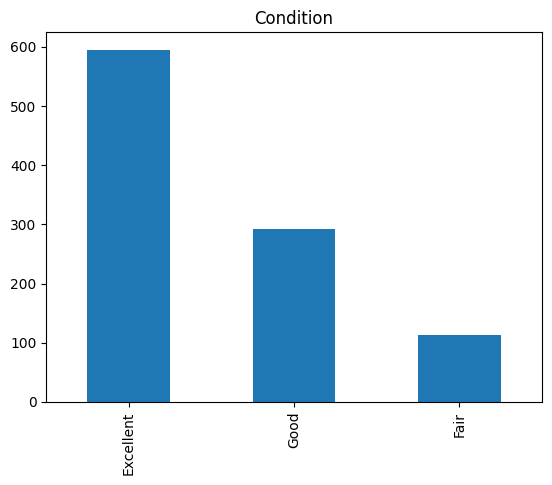

In [17]:
# feature Condition
feature = categorical_features[2]
count = car_prices[feature].value_counts()
percent = 100*car_prices[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan grafik diatas, kualitas mobil didominasi dengan fitur Excelent yang merupakan grade terbaik.

#### Numerical Features

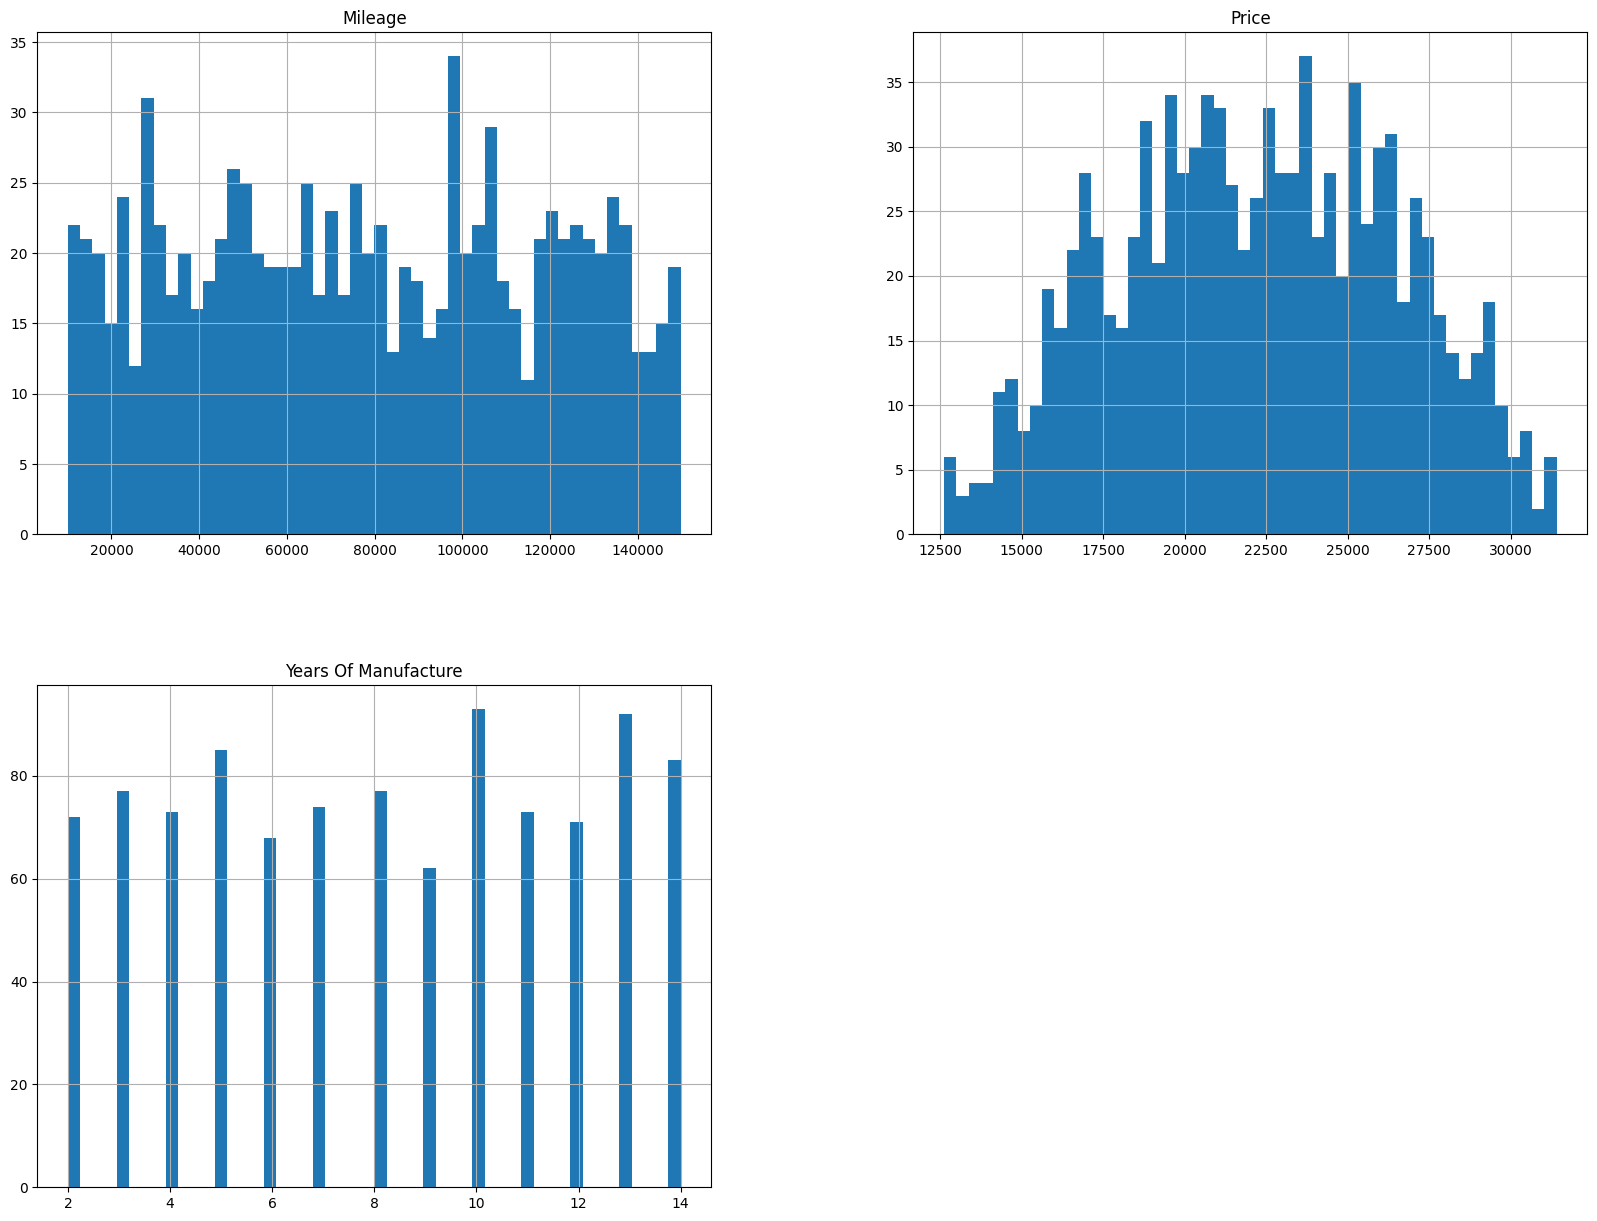

In [18]:
car_prices.hist(bins=50, figsize=(20,15))
plt.show()

Berdasarkan grafik histogram diatas, pada fitur prices diperoleh informasi sebagai berikut :  

- Sample data memusat disekitar median data. dimana dapat dilihat bahwa median data yaitu 22500 menjadi pusat sebaran data.
- sebagian besar mobil berada pada harga direntang 17500 - 25000 dollar.
- Distribusi mendekati distribusi normal, namun tetap tidak terkonsentrasi dimedian data untuk menjadikan distribusi normal (Aaimetris). Hal ini akan berdampak pada model.


### Multivariate Analysis

### Categorical Analysis

<ipython-input-19-5495aa916442>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Price", kind="bar", dodge=False, height = 5, aspect = 3,  data=car_prices, palette="Set3")
<ipython-input-19-5495aa916442>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Price", kind="bar", dodge=False, height = 5, aspect = 3,  data=car_prices, palette="Set3")
<ipython-input-19-5495aa916442>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Price", kind="bar", dodge=False, height = 5, aspect = 3,  data=car_prices, palette="Set3")


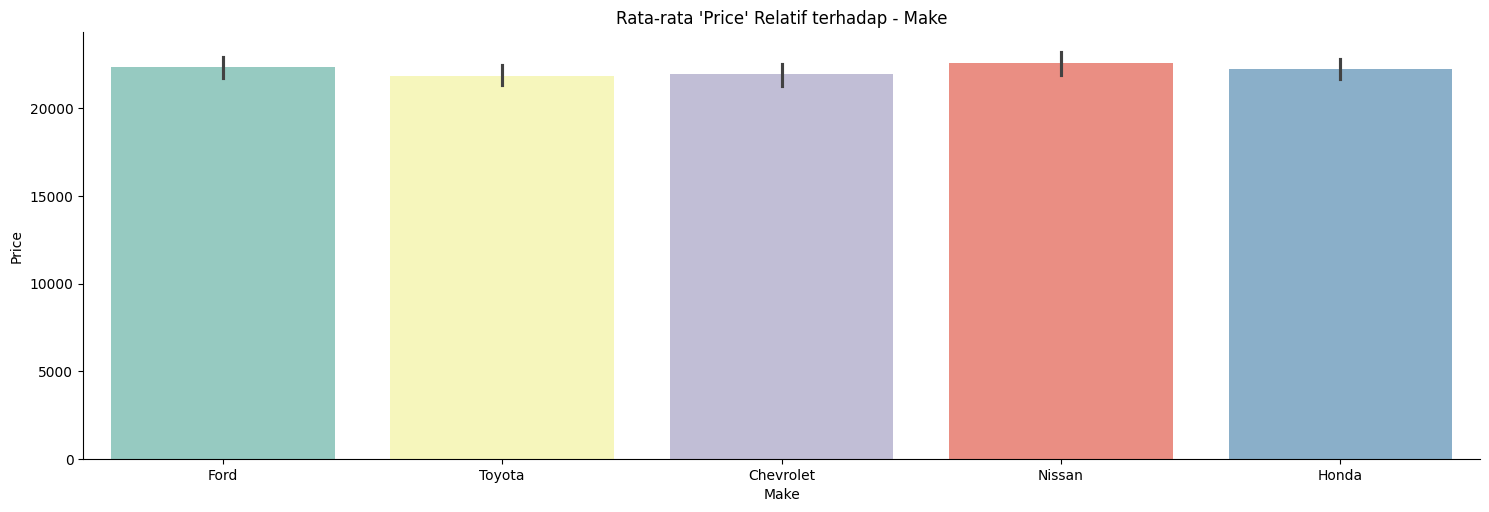

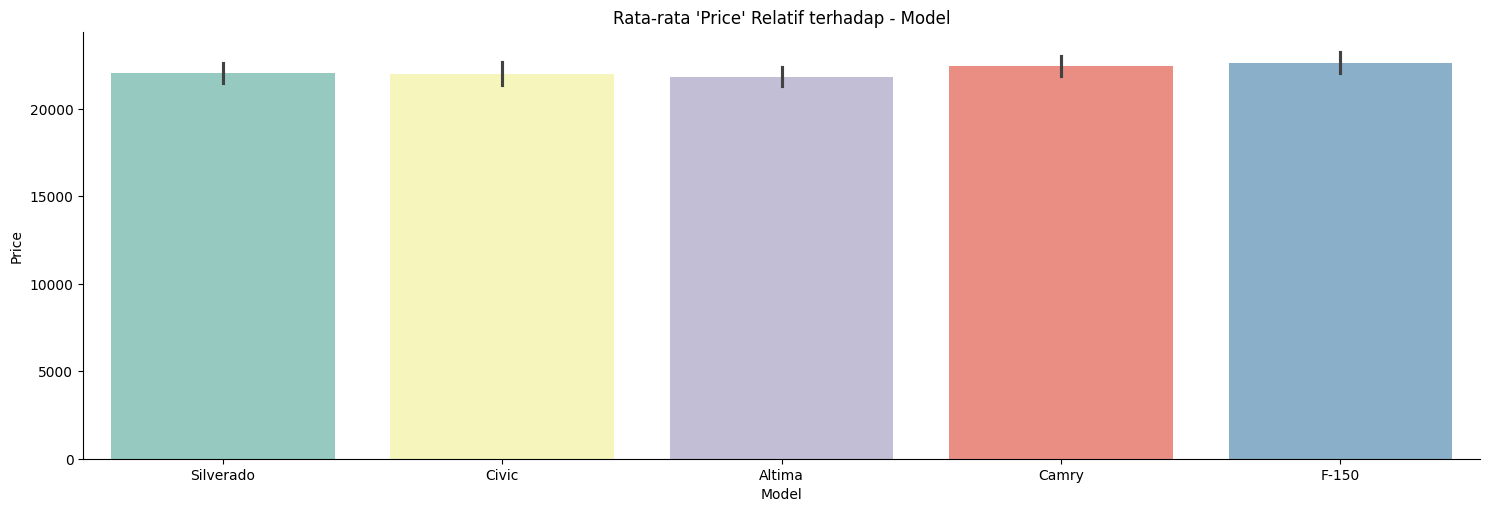

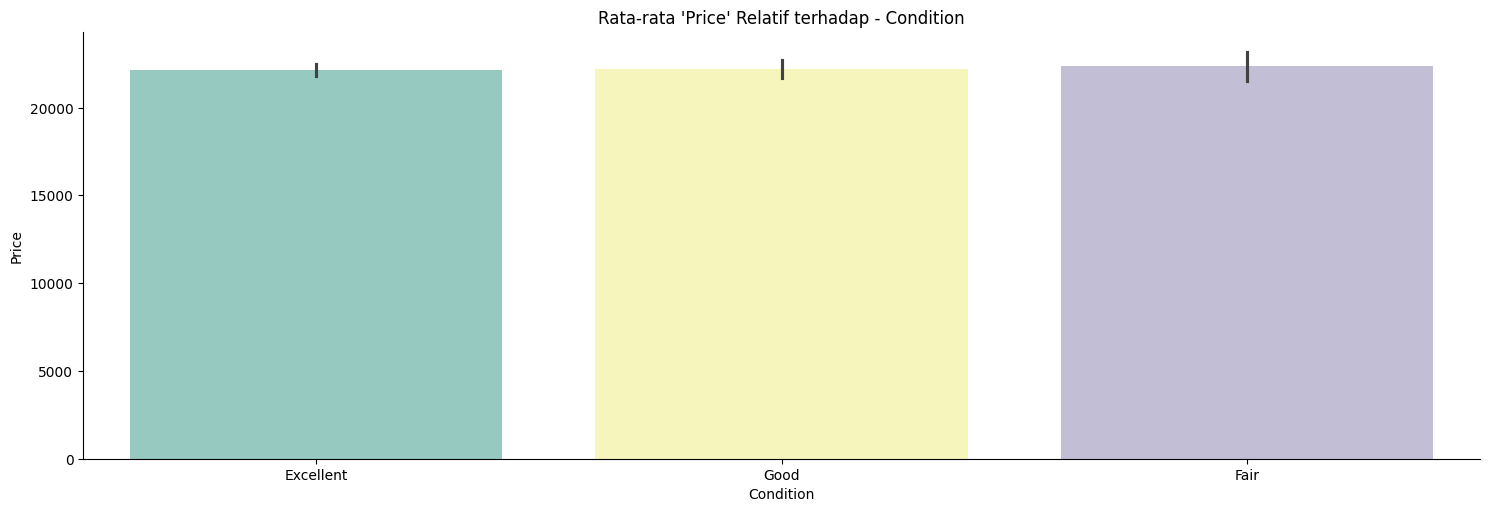

In [19]:
cat_features = car_prices.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="Price", kind="bar", dodge=False, height = 5, aspect = 3,  data=car_prices, palette="Set3")
  plt.title("Rata-rata 'Price' Relatif terhadap - {}".format(col))

Berdasarkan grafik pengaruh fitur kategorik terhadap price didapatkan insight sebagai berikut :    
- Ketiga fitur yaitu Make, Model dan Contiditon memiliki rata rata harga cenderung mirip yaitu pada kisaran diatas 20.000 Dollar keatas
- Kesimpulan akhir ketiga fitur berpengaruh rendah pada fitur target harga.

### Numerical Analysis

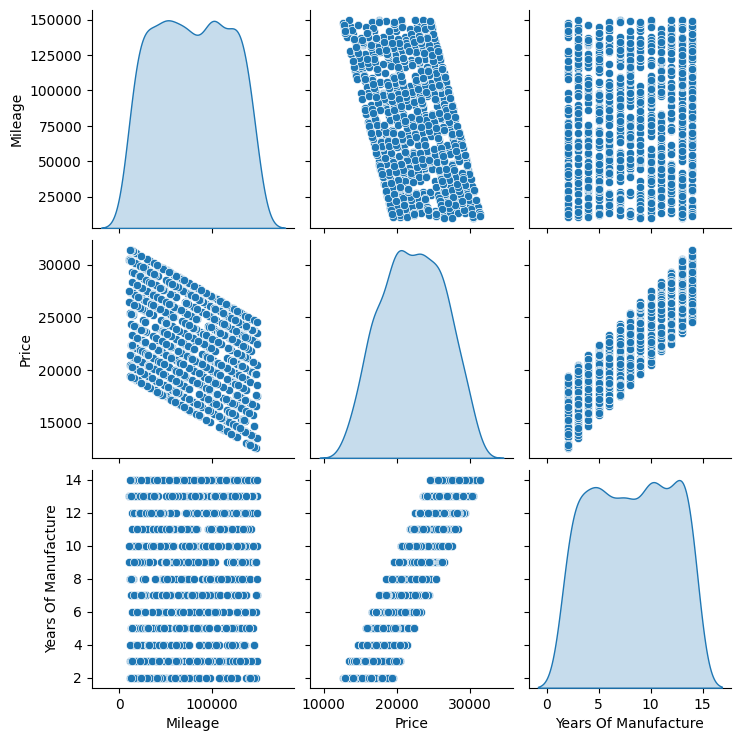

In [20]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(car_prices, diag_kind = 'kde')

<ipython-input-21-aaa88fc47e79>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = car_prices.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

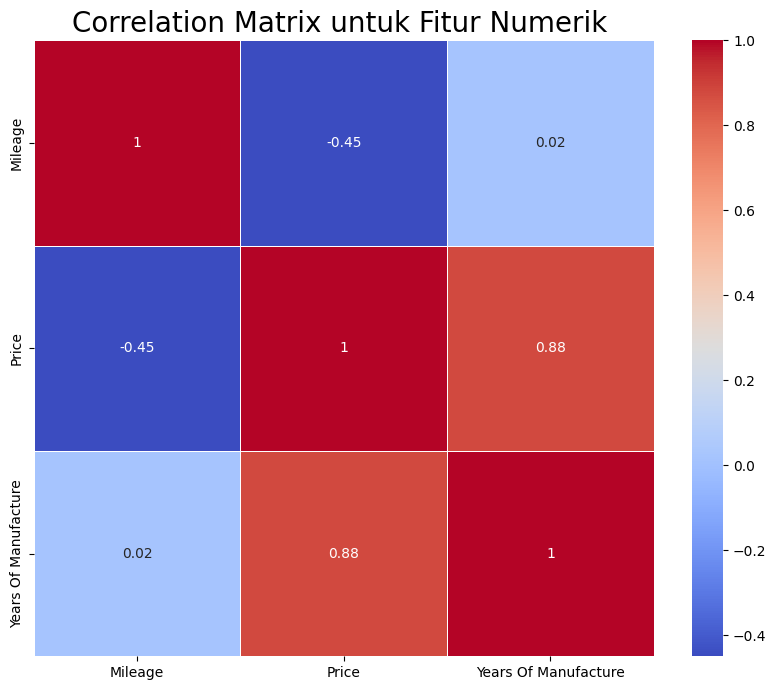

In [21]:
plt.figure(figsize=(10, 8))
correlation_matrix = car_prices.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Berdasarkan grafik diatas, pada baris ketiga didapatkan insight sebagai berikut :
- bahwa fitur **mileage** memiliki **pola menurun** seriring bertambahnya sumbu x terhadap harga (prices). Sehingga dapat disimpulkan bahwa fitur **mileage ** berkorelasi **negatif** pada fitur target.
- sedangkan fitur **Years of Manufacture** memiliki pola menaik seiring bertambahnya sumbu x terhadap y . dapat disimpulkan fitur ini berkorelasi positif pada fitur target.
- Skor korelasi pada Mileage mendekati negative 1 yaitu  **-0.45** yang menandakan fitur tersebut berpengaruh negatif pada fitur target price. Fitur **Year**  berpengaruh karena skor yang paling mendekati satu, yaitu 0.88.


# Data Preparation
---

Pada tahapan ini akan dilakukan tahapan persiapan data, yaitu :    
- Encoding Fitur Kategori
- Reduksi Dimensi dengan PCA
- Spliting Data
- Standarisasi

## Encoding Fitur Kategori

In [22]:
# One hot encoding pada fitur kategorikal
from sklearn.preprocessing import  OneHotEncoder
car_prices = pd.concat([car_prices, pd.get_dummies(car_prices['Make'], prefix='Make')],axis=1)
car_prices = pd.concat([car_prices, pd.get_dummies(car_prices['Model'], prefix='Model')],axis=1)
car_prices = pd.concat([car_prices, pd.get_dummies(car_prices['Condition'], prefix='Condition')],axis=1)
car_prices.drop(['Make','Model','Condition'], axis=1, inplace=True)
car_prices.head()

,Mileage,Price,Years Of Manufacture,Make_Chevrolet,Make_Ford,Make_Honda,Make_Nissan,Make_Toyota,Model_Altima,Model_Camry,Model_Civic,Model_F-150,Model_Silverado,Condition_Excellent,Condition_Fair,Condition_Good
0,18107,19094.75,2,0,1,0,0,0,0,0,0,0,1,1,0,0
1,13578,27321.10,10,0,0,0,0,1,0,0,0,0,1,1,0,0
2,46054,23697.30,8,1,0,0,0,0,0,0,1,0,0,0,0,1
3,34981,18251.05,2,0,1,0,0,0,0,0,1,0,0,1,0,0
4,63565,19821.85,5,1,0,0,0,0,0,0,1,0,0,1,0,0


## Reduksi Dimensi dengan PCA

Dikarenakan fitur numerik year dan mileage tidak memiliki informasi yang sama dan kedua fitur tersebut tidak memiliki korelasi sehingga tidak perlu reduksi dimensi pada fitur tersebut. Dengan kata lain fitur tersebut independen.

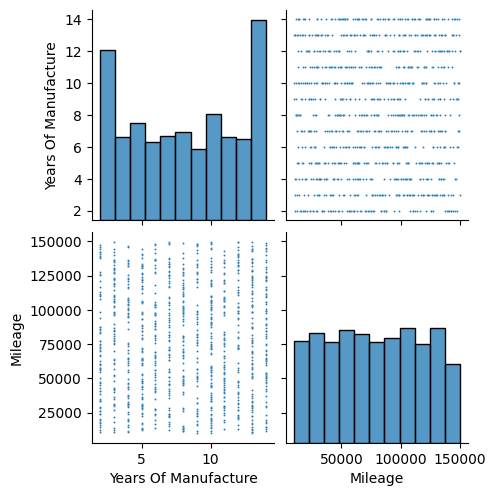

In [23]:
sns.pairplot(car_prices[['Years Of Manufacture','Mileage']], plot_kws={"s": 2});

## Spliting Data

Bagi data menjadi ratio tran : test = 90% : 10%

In [24]:
from sklearn.model_selection import train_test_split

X = car_prices.drop(["Price"],axis =1)
y = car_prices["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 12)

In [25]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1000
Total # of sample in train dataset: 900
Total # of sample in test dataset: 100


## Menormalisasi Data

untuk mempermudah dan mempercepat model mencapai konvergen data diubah menjadi pada rentang 0 - 1

In [26]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = ['Years Of Manufacture', 'Mileage']
scaler = MinMaxScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Years Of Manufacture,Mileage
919,0.916667,0.225867
759,0.250000,0.390946
704,0.250000,0.801338
431,0.666667,0.066979
694,0.250000,0.273335


In [27]:
X_train[numerical_features].describe().round(4)

,Years Of Manufacture,Mileage
count,900.0000,900.0000
mean,0.5181,0.4930
std,0.3157,0.2832
min,0.0000,0.0000
25%,0.2500,0.2550
50%,0.5000,0.4844
75%,0.8333,0.7304
max,1.0000,1.0000


# Model Development
---



## Tuning Hyperparameters
Melakukan hyperparameter tuning untuk mendapatkan parameter dengan performa terbaik pada model menggunakan grid search. Grid search akan menguji model dengan beberapa parameter sekaligus sehingga nantinya kita dapat menentukan parameter terbaik untuk model.

In [28]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
parameters = {
    'kernel': ['rbf'],
    'C':     [1000, 10000, 100000],
    'gamma': [0.3, 0.03, 0.003]
}

svr_search = GridSearchCV(
    svr,
    parameters,
    cv=5,
    verbose=3,
    n_jobs=6,
)

svr_search.fit(X_train, y_train)
svr_best_params = svr_search.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor()
parameters =  {
    'n_neighbors': range(1, 25),
}

knn_search = GridSearchCV(
  knn,
  parameters,
  cv=5,
  verbose=1,
  n_jobs=6,
)

knn_search.fit(X_train, y_train)
knn_best_params = knn_search.best_params_


Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [30]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
parameters =  {
    'n_estimators': range(1, 10),
    'max_depth': [16, 32, 64],
}

RF_search = GridSearchCV(
  RF,
  parameters,
  cv=5,
  verbose=1,
  n_jobs=6,
)
RF_search.fit(X_train, y_train)
RF_best_params = RF_search.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


## Training Model

In [31]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'svr'])

### K-Nearest Neigbor

In [32]:
knn = KNeighborsRegressor(n_neighbors=knn_best_params["n_neighbors"])
knn.fit(X_train, y_train)

models.loc['train_mse','KNN'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

### Random Forest

In [33]:
RF = RandomForestRegressor(
  n_estimators=RF_best_params["n_estimators"],
  max_depth=RF_best_params["max_depth"]
)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

### SVM

In [34]:
svr = SVR(
  C=svr_best_params["C"],
  gamma=svr_best_params["gamma"],
  kernel=svr_best_params['kernel']
)
svr.fit(X_train, y_train)

models.loc['train_mse','svr'] = mean_squared_error(y_pred=svr.predict(X_train), y_true=y_train)

# Model Evaluation
---

In [35]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [36]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','SVR'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'SVR': svr}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,0.0,3978.528277
RF,6.185566,20.510112
SVR,0.002215,0.001544


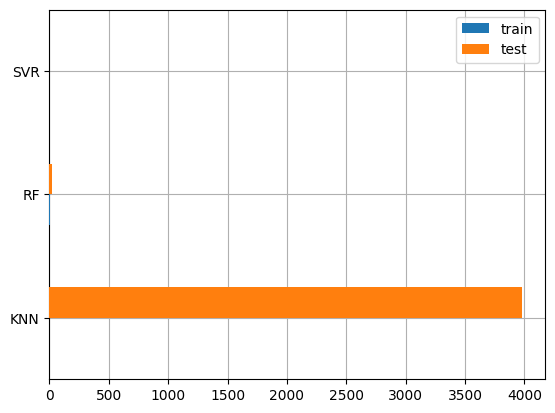

In [37]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [38]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_SVR
518,23105.8,17986.5,23112.6,23105.9
